# Womanium Final Assignment - Ayush Dutta

## Quantum Walks on a Line with 16 Nodes

### Introduction

In this notebook, we will explore the construction of a quantum walk operator for a line with 16 nodes. We will follow the example provided in Bootcamp 4, which dealt with a quantum walk on a circle with 4 nodes. Quantum walks are the quantum analog of classical random walks and have applications in quantum computing, particularly in quantum search algorithms and quantum simulations.


### Quantum Walk on a Circle with 4 Nodes

First, let's recall the construction of the quantum walk operator for a circle with 4 nodes. In a quantum walk, the walker has a position state and a coin state. The coin state determines the direction of the walk. For a circle with 4 nodes, we have the following setup:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Define the number of nodes
num_nodes = 4

# Define the coin operator (Hadamard coin)
H = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]])

# Define the shift operators
S_plus = np.roll(np.eye(num_nodes), 1, axis=0)
S_minus = np.roll(np.eye(num_nodes), -1, axis=0)

# Construct the coin-position operator
C = np.kron(np.eye(num_nodes), H)

# Construct the shift operator
S = np.kron(np.diag([1, 0]), S_plus) + np.kron(np.diag([0, 1]), S_minus)

# Combine to form the quantum walk operator
U = S @ C

# Print the quantum walk operator
print("Quantum walk operator for a circle with 4 nodes:")
print(U)

Quantum walk operator for a circle with 4 nodes:
[[ 0.          0.          0.70710678 -0.70710678  0.          0.
   0.          0.        ]
 [ 0.70710678  0.70710678  0.          0.          0.          0.
   0.          0.        ]
 [ 0.70710678 -0.70710678  0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.70710678  0.70710678  0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.70710678 -0.70710678
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.70710678  0.70710678]
 [ 0.          0.          0.          0.          0.          0.
   0.70710678 -0.70710678]
 [ 0.          0.          0.          0.          0.70710678  0.70710678
   0.          0.        ]]


#### Visualization

We can visualize the action of the quantum walk operator on the state space. For simplicity, we'll start with an initial state and observe its evolution.


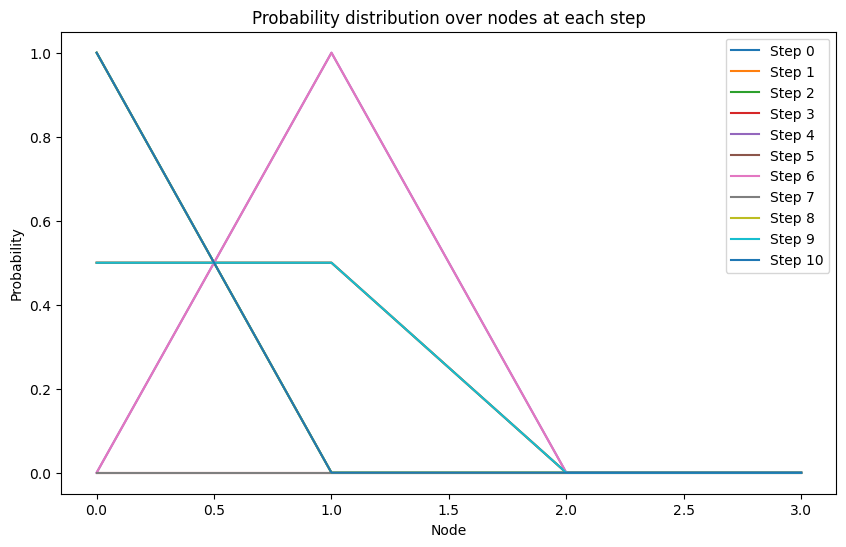

In [2]:
# Initial state: position 0, coin state |0>
initial_state = np.zeros(2 * num_nodes)
initial_state[0] = 1

# Number of steps
num_steps = 10

# Evolve the state
state = initial_state
states = [state]

for _ in range(num_steps):
    state = U @ state
    states.append(state)

# Plot the probability distribution
plt.figure(figsize=(10, 6))
for step, state in enumerate(states):
    probabilities = np.abs(state.reshape((num_nodes, 2)).sum(axis=1))**2
    plt.plot(probabilities, label=f"Step {step}")

plt.xlabel("Node")
plt.ylabel("Probability")
plt.title("Probability distribution over nodes at each step")
plt.legend()
plt.show()

### Quantum Walk on a Line with 16 Nodes

Now, let's transition to a line with 16 nodes. The main difference is that the walk is not cyclic, so we need to handle the boundaries appropriately.


In [3]:
# Define the number of nodes
num_nodes = 16

# Define the coin operator (Hadamard coin)
H = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]])

# Define the shift operators
S_plus = np.roll(np.eye(num_nodes), 1, axis=0)
S_minus = np.roll(np.eye(num_nodes), -1, axis=0)

# Handle boundaries: ensure no wrap-around
S_plus[0, -1] = 0
S_minus[-1, 0] = 0

# Construct the coin-position operator
C = np.kron(np.eye(num_nodes), H)

# Construct the shift operator
S = np.kron(np.diag([1, 0]), S_plus) + np.kron(np.diag([0, 1]), S_minus)

# Combine to form the quantum walk operator
U = S @ C

# Print the quantum walk operator
print("Quantum walk operator for a line with 16 nodes:")
print(U)

Quantum walk operator for a line with 16 nodes:
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.70710678  0.70710678  0.         ...  0.          0.
   0.        ]
 [ 0.70710678 -0.70710678  0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.70710678
   0.70710678]
 [ 0.          0.          0.         ...  0.          0.70710678
  -0.70710678]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


#### Visualization

We can visualize the action of the quantum walk operator on the state space for the line with 16 nodes as we did for the circle.


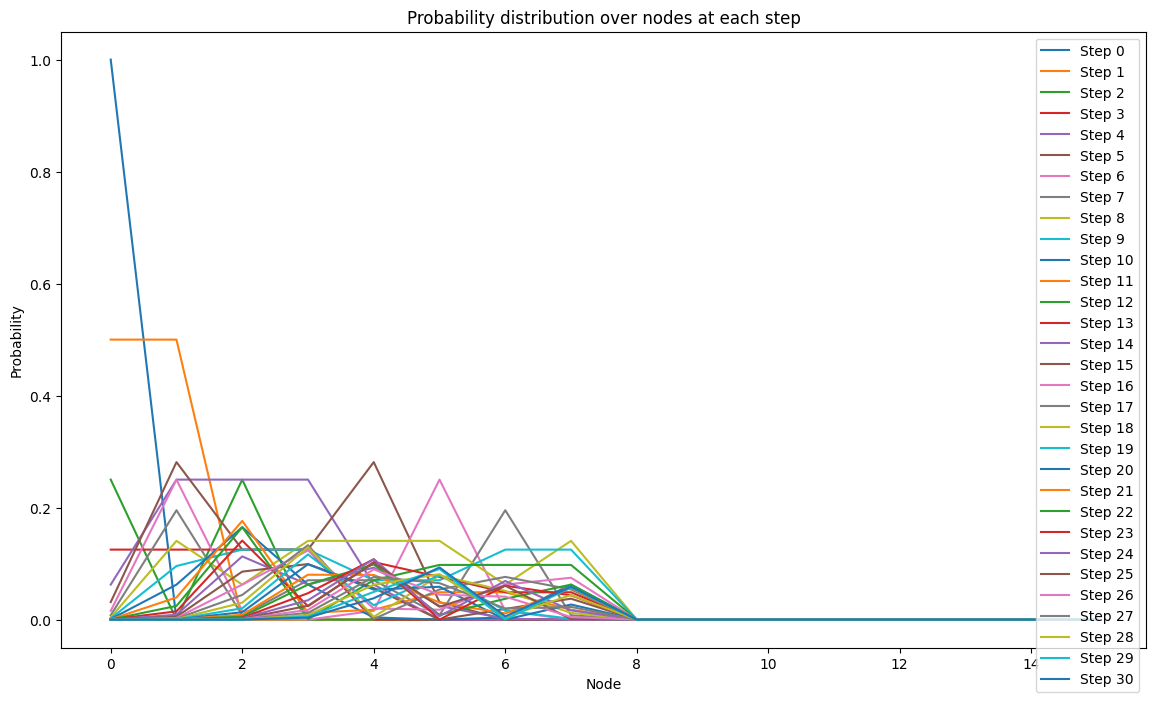

In [4]:
# Initial state: position 0, coin state |0>
initial_state = np.zeros(2 * num_nodes)
initial_state[0] = 1

# Number of steps
num_steps = 30

# Evolve the state
state = initial_state
states = [state]

for _ in range(num_steps):
    state = U @ state
    states.append(state)

# Plot the probability distribution
plt.figure(figsize=(14, 8))
for step, state in enumerate(states):
    probabilities = np.abs(state.reshape((num_nodes, 2)).sum(axis=1))**2
    plt.plot(probabilities, label=f"Step {step}")

plt.xlabel("Node")
plt.ylabel("Probability")
plt.title("Probability distribution over nodes at each step")
plt.legend()
plt.show()

### Conclusion

In this notebook, we have constructed and visualized the quantum walk operator for a line with 16 nodes. We started by recalling the example of a circle with 4 nodes and then adapted the method for a line. This approach can be extended to other graph structures and used in various quantum algorithms.
